In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/churn-data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print("Rows with invalid TotalCharges values:")
print(data[data['TotalCharges'].isna()][['customerID', 'TotalCharges']])
data = data.dropna(subset=['TotalCharges'])
data = data.drop('customerID', axis=1)

Rows with invalid TotalCharges values:
      customerID  TotalCharges
488   4472-LVYGI           NaN
753   3115-CZMZD           NaN
936   5709-LVOEQ           NaN
1082  4367-NUYAO           NaN
1340  1371-DWPAZ           NaN
3331  7644-OMVMY           NaN
3826  3213-VVOLG           NaN
4380  2520-SGTTA           NaN
5218  2923-ARZLG           NaN
6670  4075-WKNIU           NaN
6754  2775-SEFEE           NaN


In [8]:
df1 = data.copy(deep=True)
categorical_cols = [col for col in data.columns if col not in data.describe().columns]

label_encoders = {}

print('Label Encoder Transformation')
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df1[col] = label_encoders[col].fit_transform(df1[col])
    original_values = label_encoders[col].classes_
    encoded_values = range(len(original_values))
    print(f"{col}:")
    for orig, enc in zip(original_values, encoded_values):
        print(f"    {orig} -> {enc}")
    print()

Label Encoder Transformation
gender:
    Female -> 0
    Male -> 1

Partner:
    No -> 0
    Yes -> 1

Dependents:
    No -> 0
    Yes -> 1

PhoneService:
    No -> 0
    Yes -> 1

MultipleLines:
    No -> 0
    No phone service -> 1
    Yes -> 2

InternetService:
    DSL -> 0
    Fiber optic -> 1
    No -> 2

OnlineSecurity:
    No -> 0
    No internet service -> 1
    Yes -> 2

OnlineBackup:
    No -> 0
    No internet service -> 1
    Yes -> 2

DeviceProtection:
    No -> 0
    No internet service -> 1
    Yes -> 2

TechSupport:
    No -> 0
    No internet service -> 1
    Yes -> 2

StreamingTV:
    No -> 0
    No internet service -> 1
    Yes -> 2

StreamingMovies:
    No -> 0
    No internet service -> 1
    Yes -> 2

Contract:
    Month-to-month -> 0
    One year -> 1
    Two year -> 2

PaperlessBilling:
    No -> 0
    Yes -> 1

PaymentMethod:
    Bank transfer (automatic) -> 0
    Credit card (automatic) -> 1
    Electronic check -> 2
    Mailed check -> 3

Churn:
    No -> 0
 

In [9]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


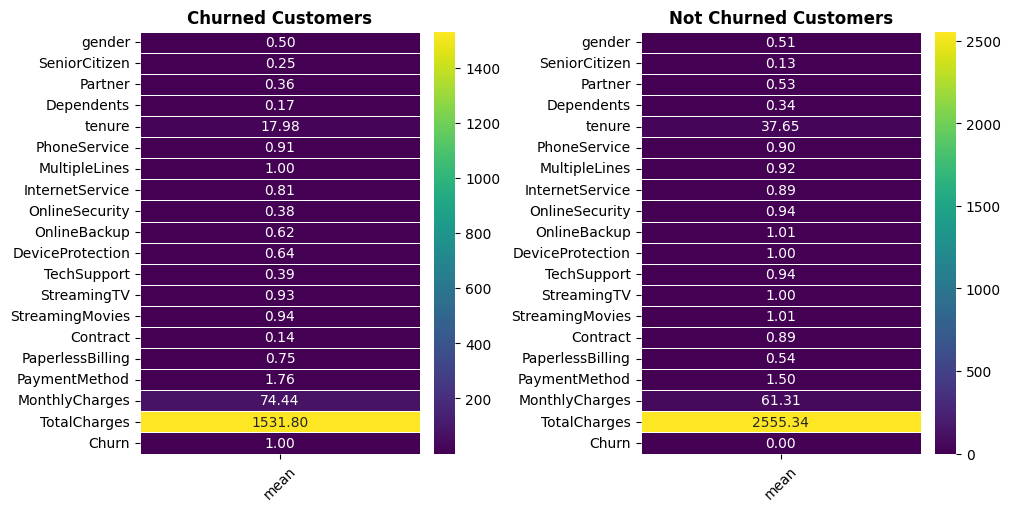

In [10]:
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)

sns.heatmap(churn[['mean']], annot=True, cmap='viridis', linewidths=0.5, linecolor='white', cbar=True, fmt='.2f', ax=ax[0])
ax[0].set_title('Churned Customers', fontsize=12, fontweight='bold')
ax[0].tick_params(axis='x', rotation=45)
ax[0].tick_params(axis='y', rotation=0)

sns.heatmap(not_churn[['mean']], annot=True, cmap='viridis', linewidths=0.5, linecolor='white', cbar=True, fmt='.2f', ax=ax[1])
ax[1].set_title('Not Churned Customers', fontsize=12, fontweight='bold')
ax[1].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='y', rotation=0)

plt.show()

In [11]:
col = list(df1.columns)
categorical_features = [i for i in col if len(df1[i].unique()) <= 6]
numerical_features = [i for i in col if len(df1[i].unique()) > 6]

print('Categorical Features :', *categorical_features)
print('Numerical Features :', *numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


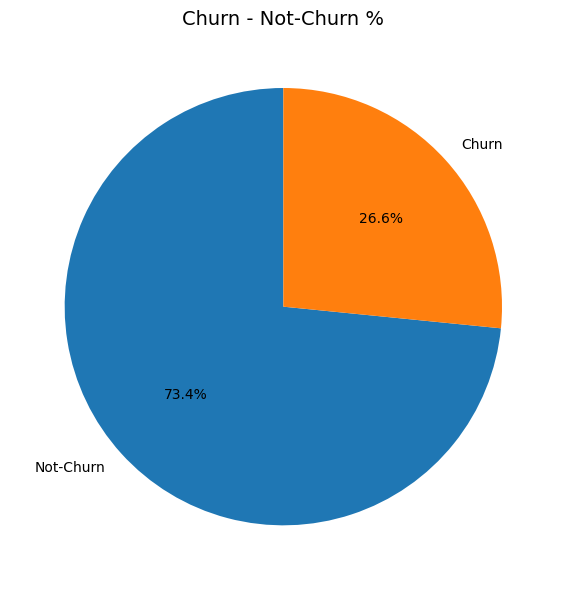

In [12]:
churn_counts = df1['Churn'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(churn_counts, labels=['Not-Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
ax.set_title('Churn - Not-Churn %', fontsize=14)

plt.tight_layout()
plt.show()


In [13]:
categorical_features.remove('Churn')

In [14]:
feature_categories = {
    'Customer Information': ['gender', 'SeniorCitizen', 'Partner', 'Dependents'],
    'Services Signed Up for': ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies',
                               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'],
    'Payment Information': ['Contract', 'PaperlessBilling', 'PaymentMethod']
}

l1 = feature_categories['Customer Information']
l2 = feature_categories['Services Signed Up for']
l3 = feature_categories['Payment Information']


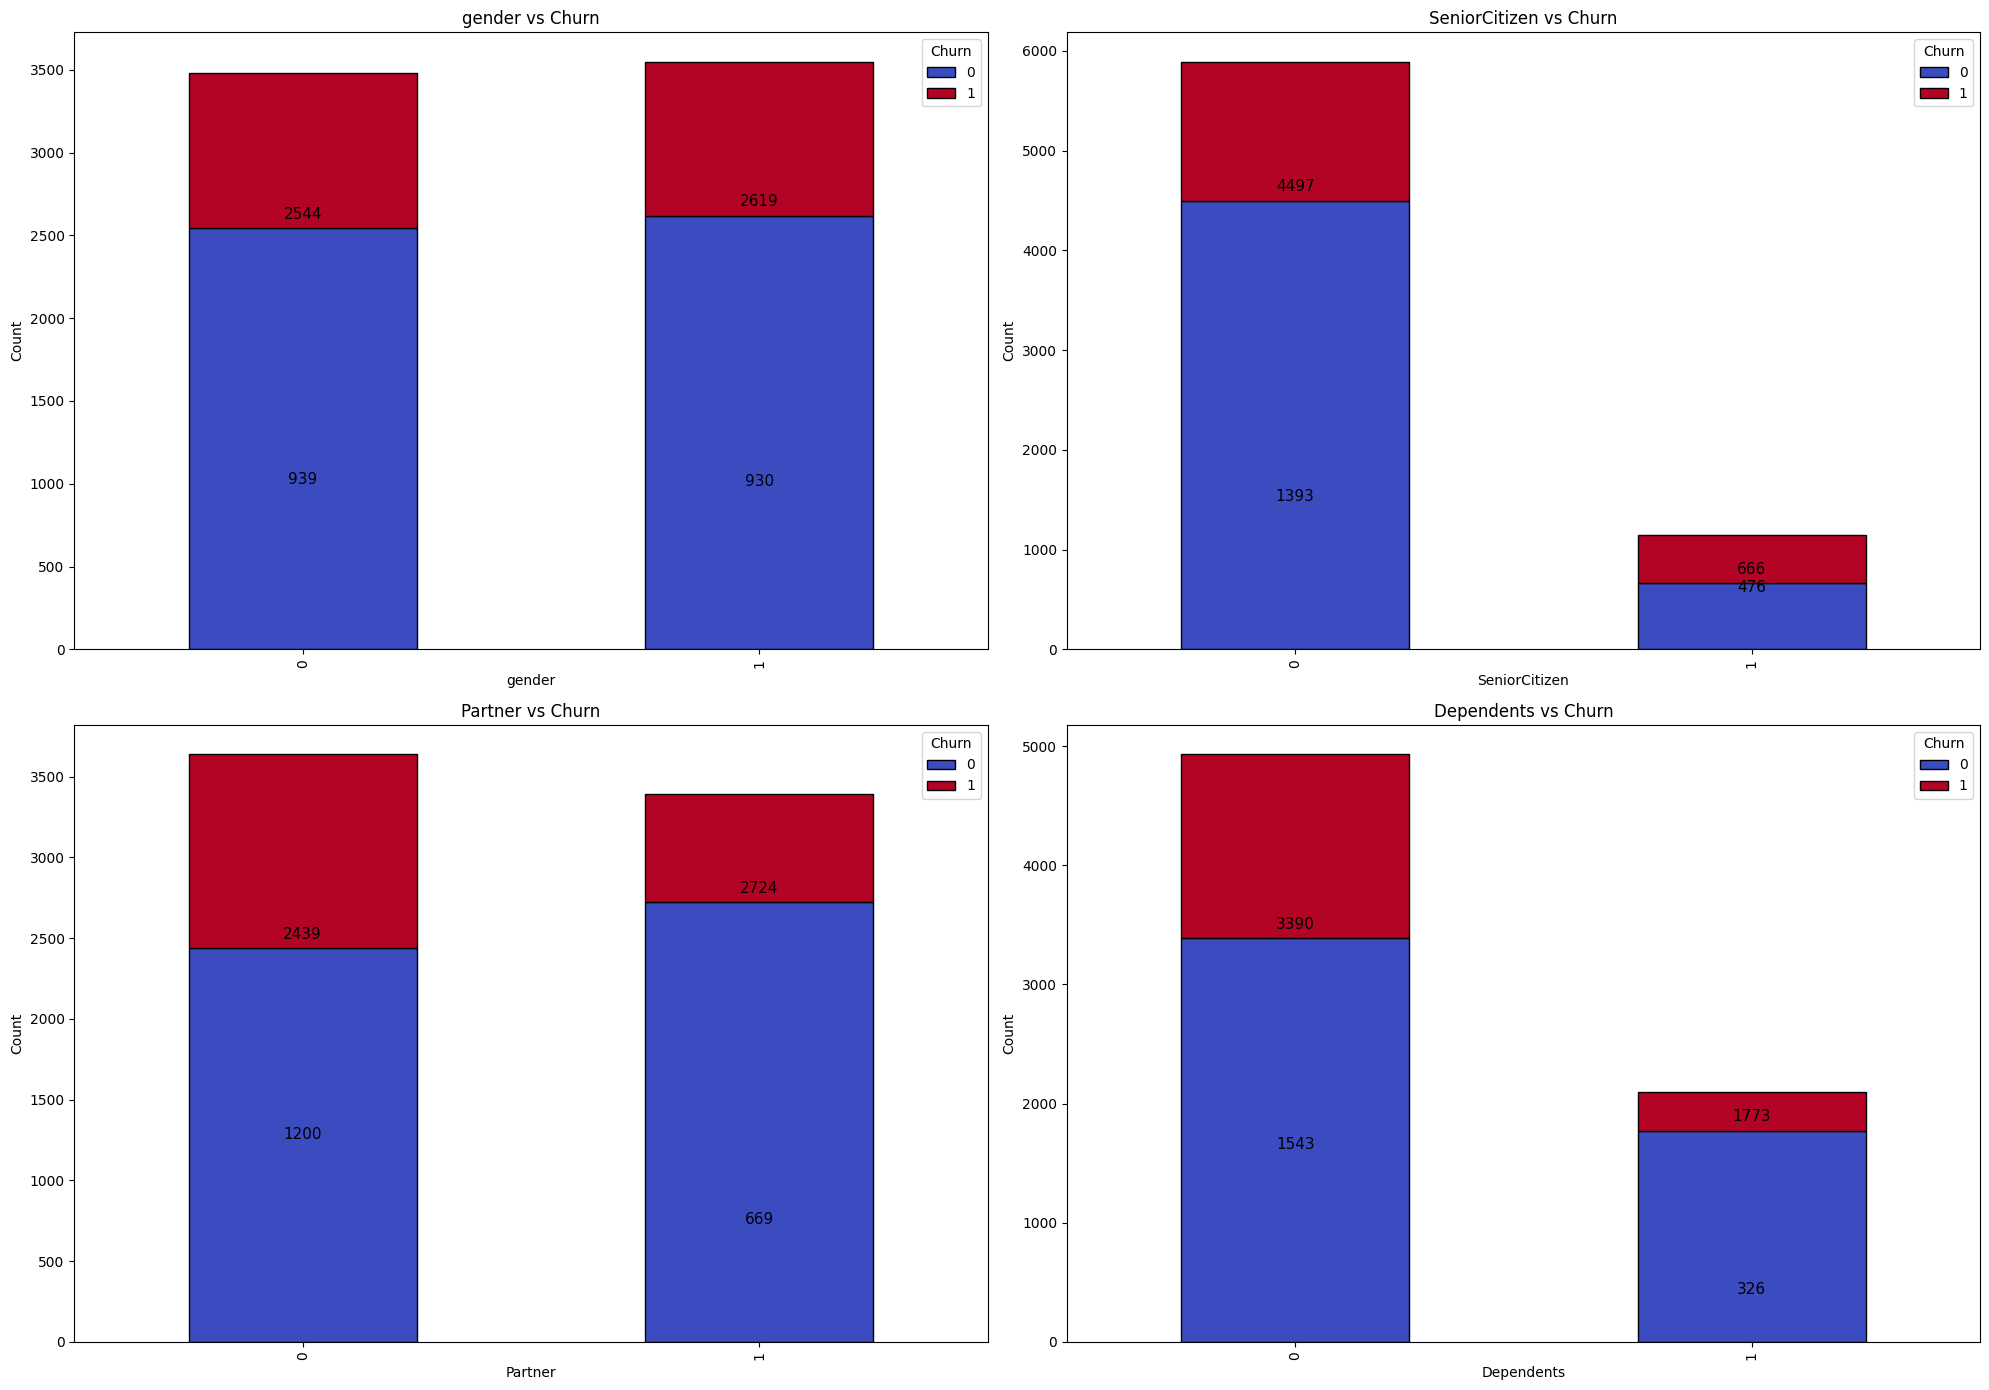

In [15]:
cmap = cm.get_cmap('coolwarm', 2)
cmap = cm.get_cmap('coolwarm', 2)
coolwarm_colors = [cmap(0), cmap(1)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i, column in enumerate(l1):
    ax = axes[i // 2, i % 2]
    churn_counts = df1.groupby([column, 'Churn']).size().unstack()
    churn_counts.plot(kind='bar', stacked=True, color=coolwarm_colors, ax=ax, edgecolor='black')
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11)
    
    title = f'{column} vs Churn'
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()


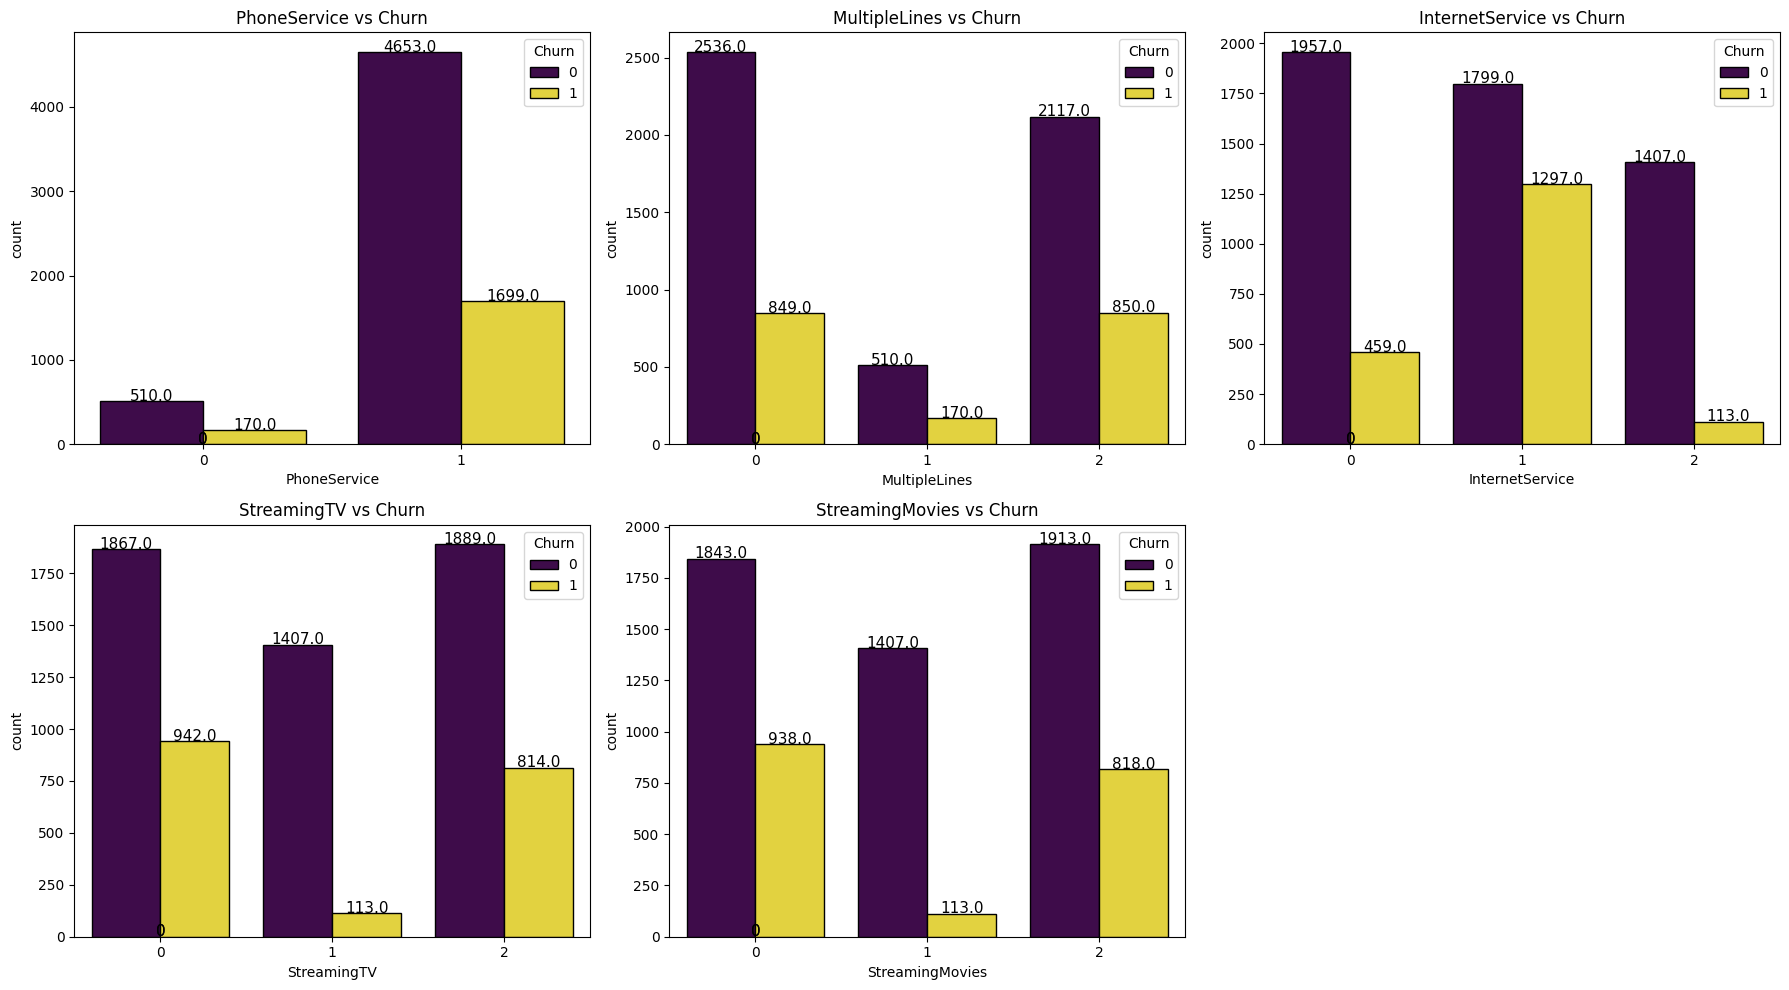

In [16]:
cmap = cm.get_cmap('viridis', 2)
viridis_colors = [cmap(0), cmap(1)]

def create_countplot(ax, column, data, hue, palette):
    sns.countplot(x=column, data=data, hue=hue, palette=palette, ax=ax, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)
    ax.set_title(f'{column} vs Churn')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, column in enumerate(l2[:2]):
    create_countplot(axes[0, i], column, df1, "Churn", viridis_colors)

create_countplot(axes[0, 2], l2[2], df1, "Churn", viridis_colors)

for i, column in enumerate(l2[3:5]):
    create_countplot(axes[1, i], column, df1, "Churn", viridis_colors)

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

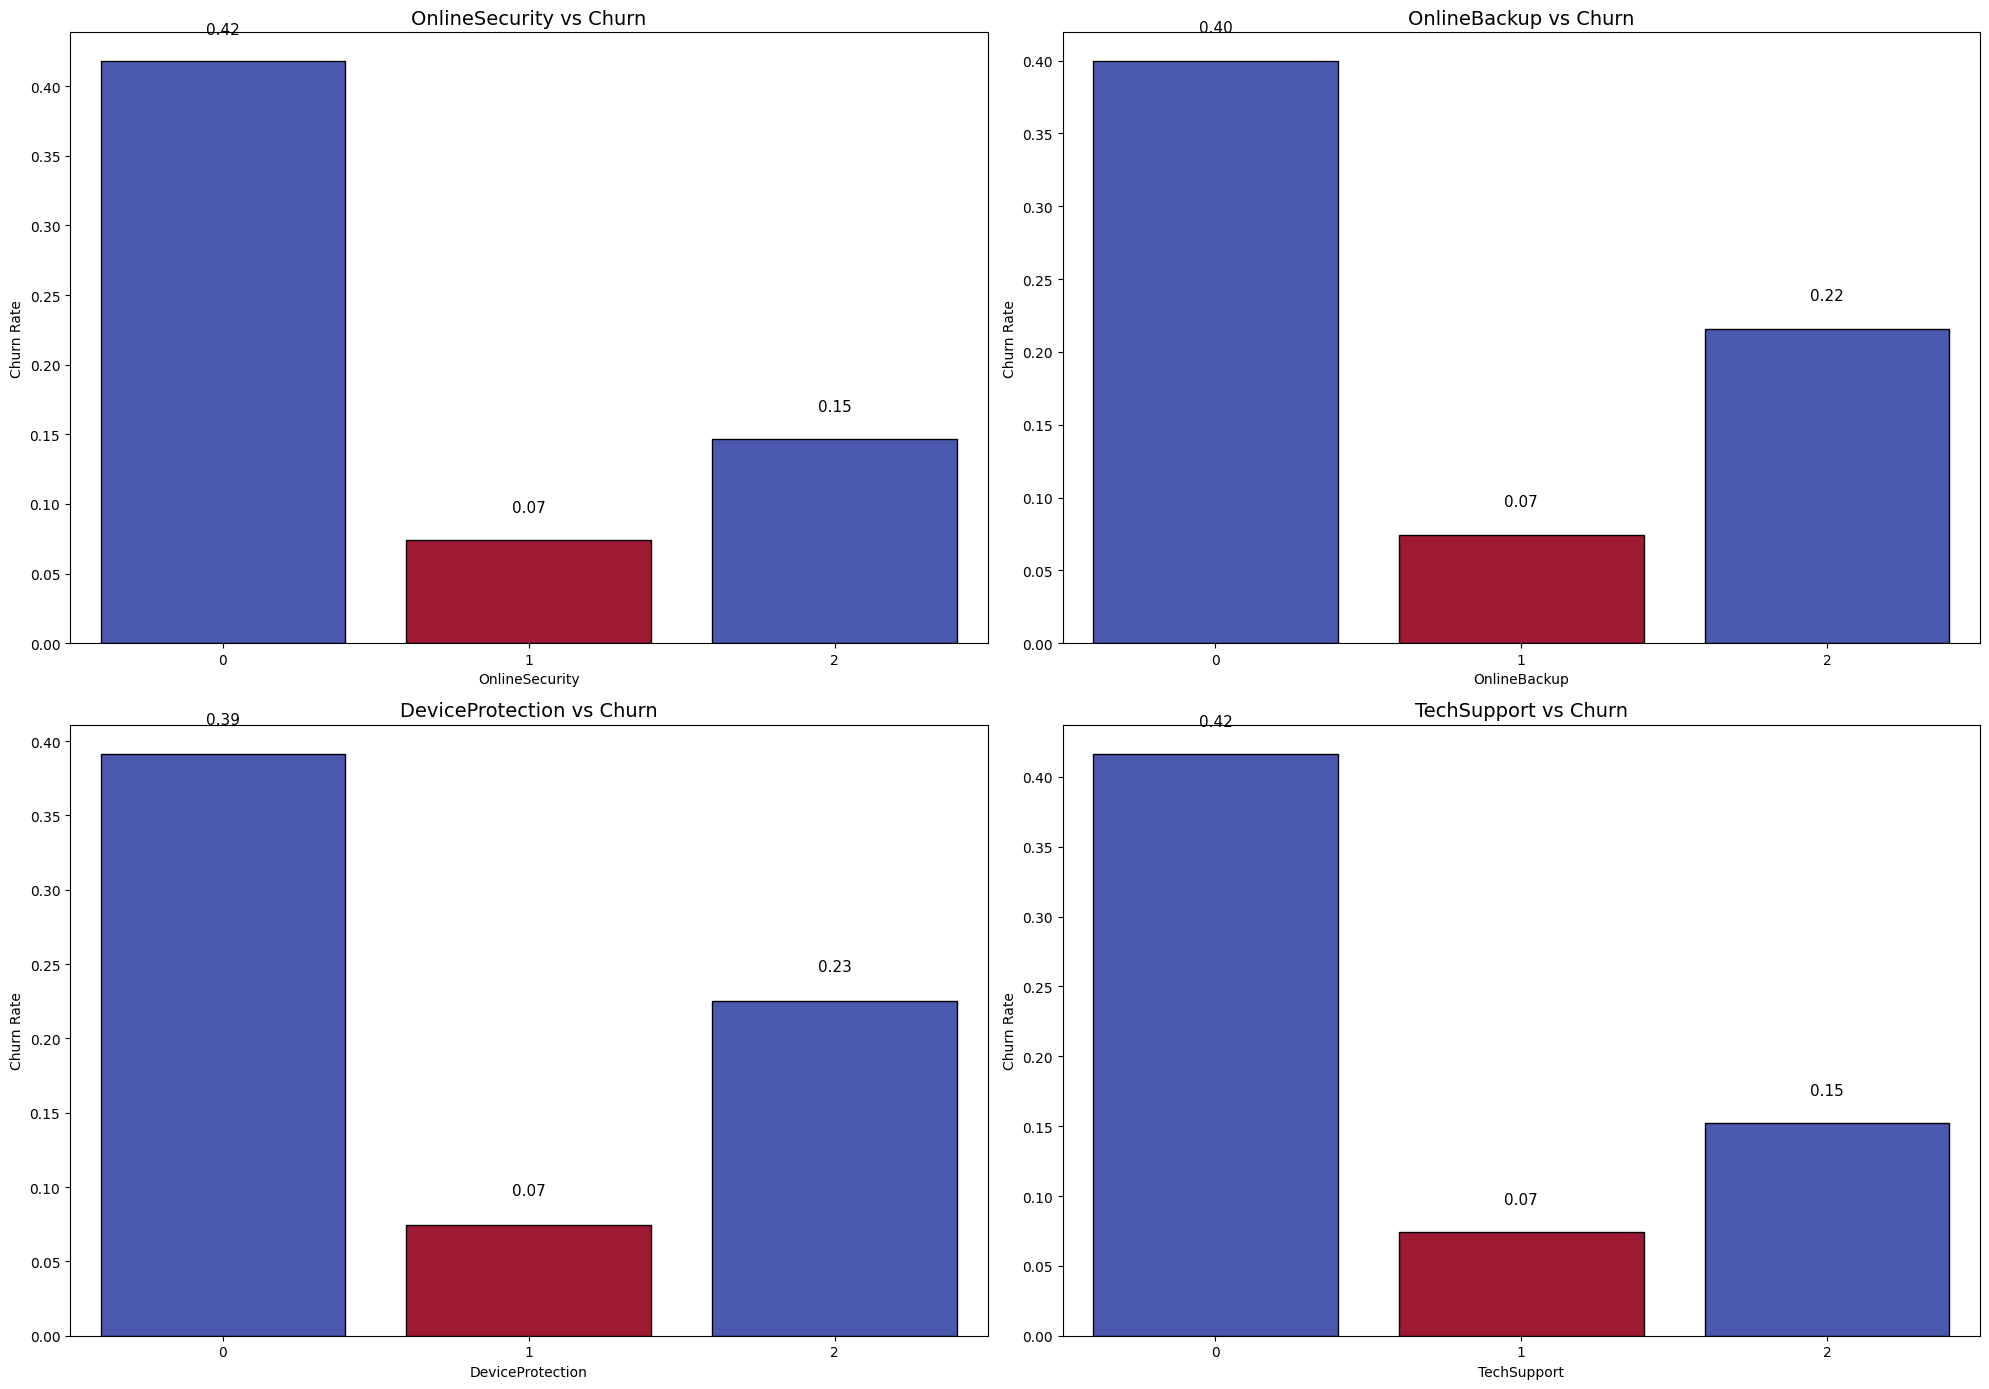

In [17]:
cmap = cm.get_cmap('coolwarm', 2)
colors = [cmap(0), cmap(1)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i, ax in enumerate(axes.flatten()):
    column = l2[-4 + i]
    
    sns.barplot(x=column, y='Churn', data=df1, ax=ax, palette=colors, ci=None, edgecolor='black')
    
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.02, f'{rect.get_height():.2f}',
                horizontalalignment='center', fontsize=11)
    
    ax.set_title(f'{column} vs Churn', fontsize=14)
    ax.set_ylabel('Churn Rate')

plt.tight_layout()
plt.show()


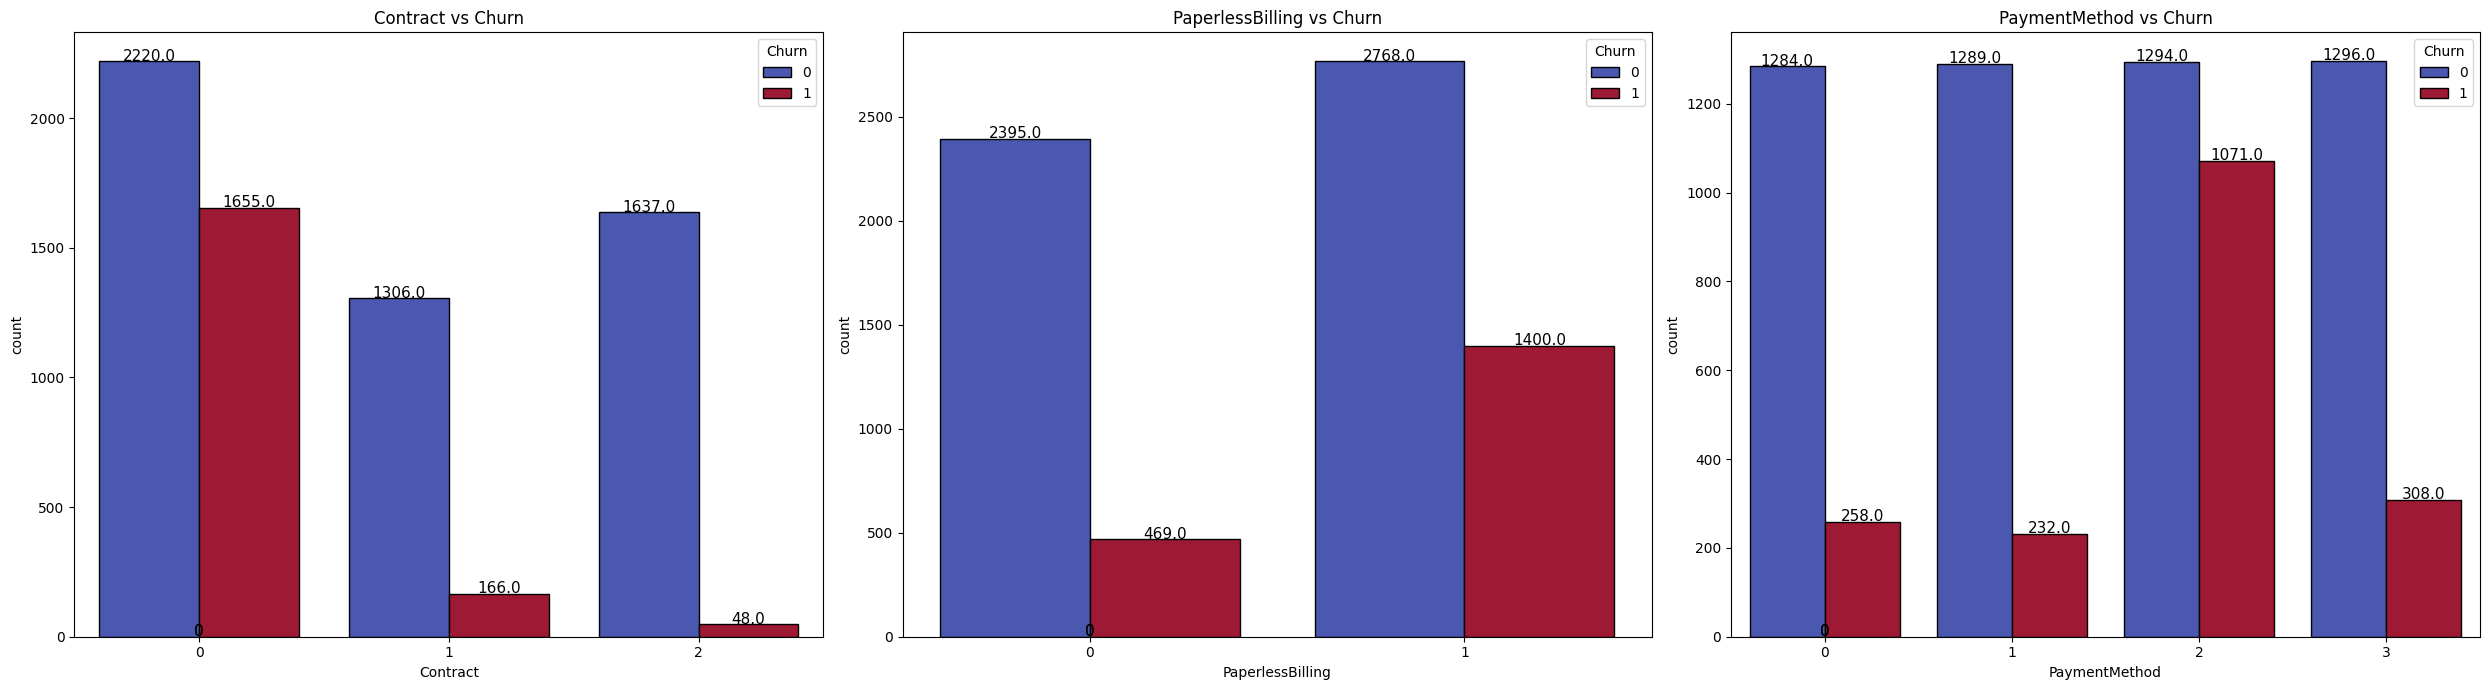

In [18]:
cmap = cm.get_cmap('coolwarm', 2)
coolwarm_colors = [cmap(0), cmap(1)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

plt.subplot(1, 3, 1)
ax = sns.countplot(x=l3[0], data=df1, hue="Churn", palette=coolwarm_colors, edgecolor='black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)

title = l3[0] + ' vs Churn'
plt.title(title)

plt.subplot(1, 3, 2)
ax = sns.countplot(x=l3[1], data=df1, hue="Churn", palette=coolwarm_colors, edgecolor='black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)

title = l3[1] + ' vs Churn'
plt.title(title)

plt.subplot(1, 3, 3)
ax = sns.countplot(x=l3[2], data=df1, hue="Churn", palette=coolwarm_colors, edgecolor='black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)

title = l3[2] + ' vs Churn'
plt.title(title)

plt.tight_layout()
plt.show()

In [19]:
def calculate_percentage(column_name):
    counts = df1[df1['Churn'] == 1][column_name].value_counts(normalize=True) * 100
    return counts.tolist()

gender = calculate_percentage('gender') 
seniorcitizen = calculate_percentage('SeniorCitizen') 
partner = calculate_percentage('Partner') 
dependents = calculate_percentage('Dependents') 

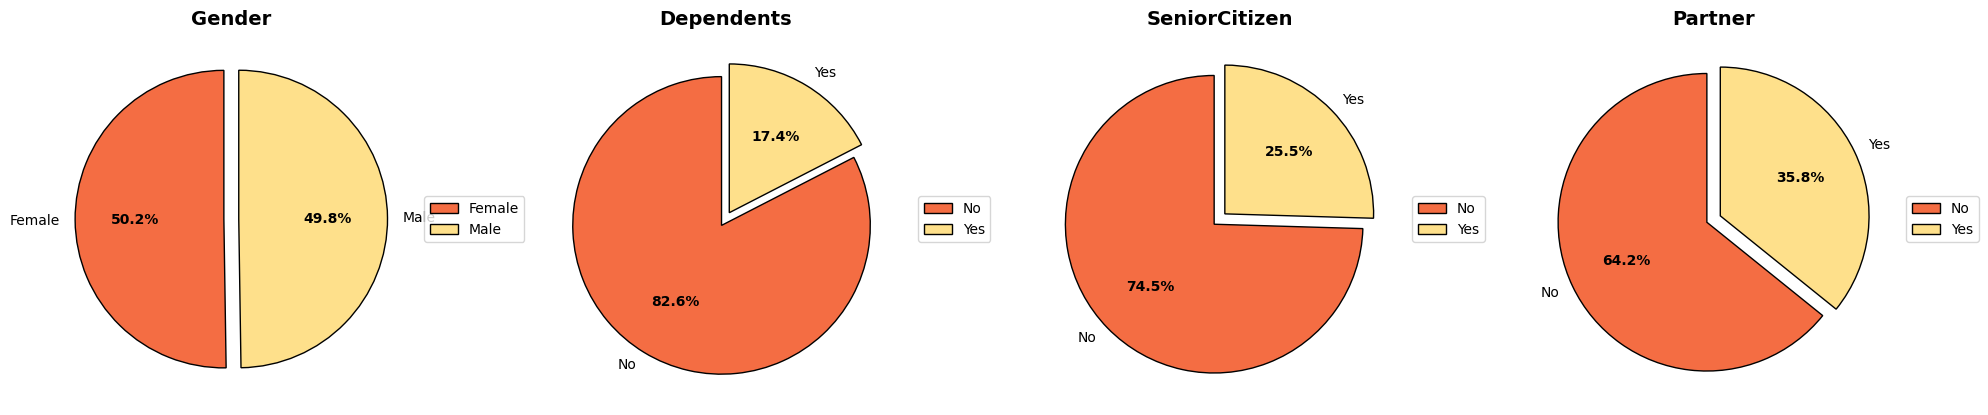

In [20]:
colors = sns.color_palette("Spectral", 4)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), subplot_kw=dict(aspect="equal"))

def create_pie(ax, data, labels, title):
    wedges, texts, autotexts = ax.pie(
        data,
        labels=labels,
        autopct=lambda pct: f'{pct:.1f}%',
        startangle=90,
        explode=[0.05] * len(data),
        colors=colors[:len(data)],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True, 'linestyle': 'solid'}
    )
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(wedges, labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
    for text in autotexts:
        text.set_color('black')
        text.set_fontweight('bold')
        text.set_fontsize(10)

create_pie(axes[0], gender, ['Female', 'Male'], 'Gender')
create_pie(axes[2], seniorcitizen, ['No', 'Yes'], 'SeniorCitizen')
create_pie(axes[3], partner, ['No', 'Yes'], 'Partner')
create_pie(axes[1], dependents, ['No', 'Yes'], 'Dependents')

plt.tight_layout()
plt.show()

In [21]:
def calculate_churn_percentage(column_name):
    value_counts = df1[df1['Churn'] == 1][column_name].value_counts(normalize=True) * 100
    return value_counts.reindex(df1[column_name].unique(), fill_value=0).tolist()

phoneservice = calculate_churn_percentage('PhoneService') 
multiplelines = calculate_churn_percentage('MultipleLines') 
internetservice = calculate_churn_percentage('InternetService') 
streamingtv = calculate_churn_percentage('StreamingTV') 
streamingmovies = calculate_churn_percentage('StreamingMovies') 

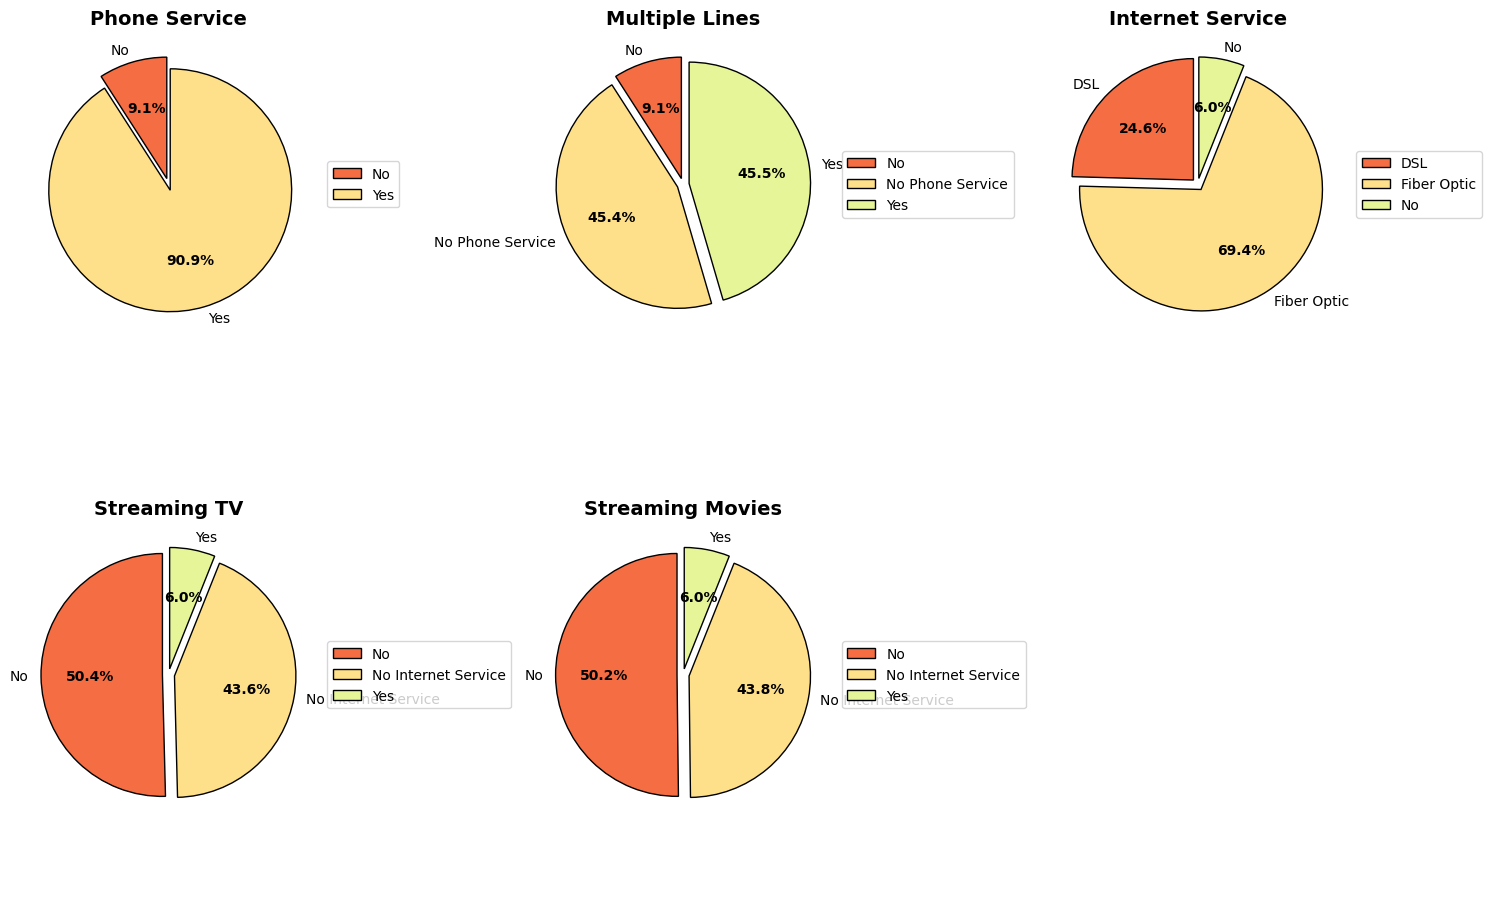

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

create_pie(axes[0, 0], phoneservice, ['No', 'Yes'], 'Phone Service')
create_pie(axes[0, 1], multiplelines, ['No', 'No Phone Service', 'Yes'], 'Multiple Lines')
create_pie(axes[0, 2], internetservice, ['DSL', 'Fiber Optic', 'No'], 'Internet Service')
create_pie(axes[1, 0], streamingtv, ['No', 'No Internet Service', 'Yes'], 'Streaming TV')
create_pie(axes[1, 1], streamingmovies, ['No', 'No Internet Service', 'Yes'], 'Streaming Movies')

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [23]:
def calculate_service_percentages(column_name):
    churned_counts = df1[df1['Churn'] == 1][column_name].value_counts()
    total = churned_counts.sum()
    return [churned_counts[i] / total * 100 for i in range(len(churned_counts))]

services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
service_percentages = {}

for service in services:
    service_percentages[service.lower()] = calculate_service_percentages(service)
    
onlinesecurity = service_percentages['onlinesecurity'] 
onlinebackup = service_percentages['onlinebackup']  
deviceprotection = service_percentages['deviceprotection'] 
techsupport = service_percentages['techsupport'] 

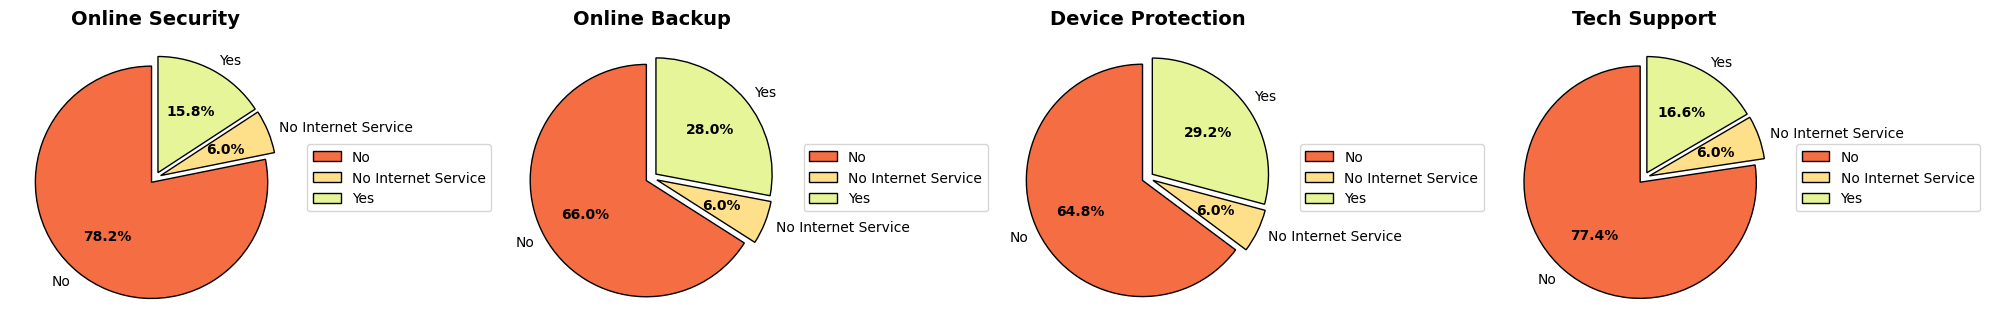

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

create_pie(axes[0], onlinesecurity, ['No', 'No Internet Service', 'Yes'], 'Online Security')
create_pie(axes[1], onlinebackup, ['No', 'No Internet Service', 'Yes'], 'Online Backup')
create_pie(axes[2], deviceprotection, ['No', 'No Internet Service', 'Yes'], 'Device Protection')
create_pie(axes[3], techsupport, ['No', 'No Internet Service', 'Yes'], 'Tech Support')

plt.tight_layout()
plt.show()

In [25]:
churned_data = df1[df1['Churn'] == 1]

def get_percentage_distribution(data, column):
    counts = data[column].value_counts()
    return (counts / counts.sum() * 100).tolist()

contract = get_percentage_distribution(churned_data, 'Contract')
paperlessbilling = get_percentage_distribution(churned_data, 'PaperlessBilling') 
paymentmethod = get_percentage_distribution(churned_data, 'PaymentMethod')

colors = sns.color_palette("Spectral", 4)

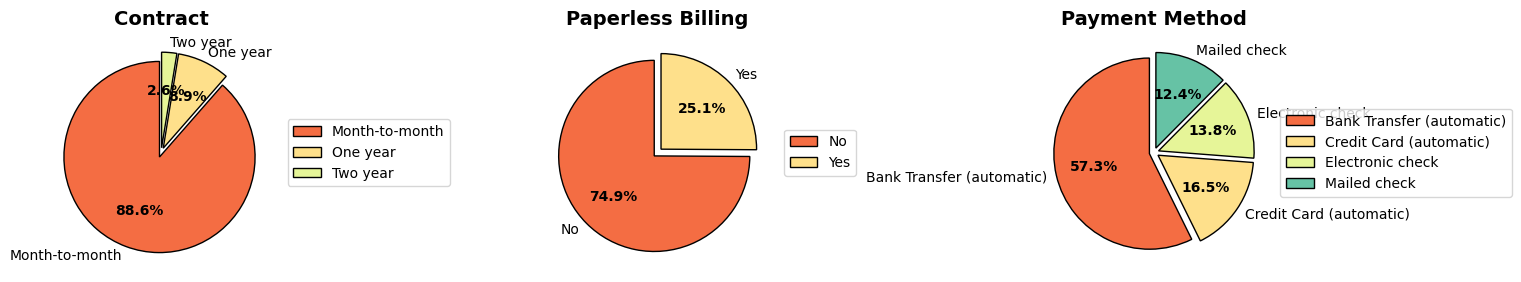

In [26]:
colors = sns.color_palette("Spectral", 4)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

create_pie(axes[0], contract, ['Month-to-month', 'One year', 'Two year'], 'Contract')
create_pie(axes[1], paperlessbilling, ['No', 'Yes'], 'Paperless Billing')
create_pie(axes[2], paymentmethod, ['Bank Transfer (automatic)', 'Credit Card (automatic)', 'Electronic check', 'Mailed check'], 'Payment Method')

plt.tight_layout()
plt.show()

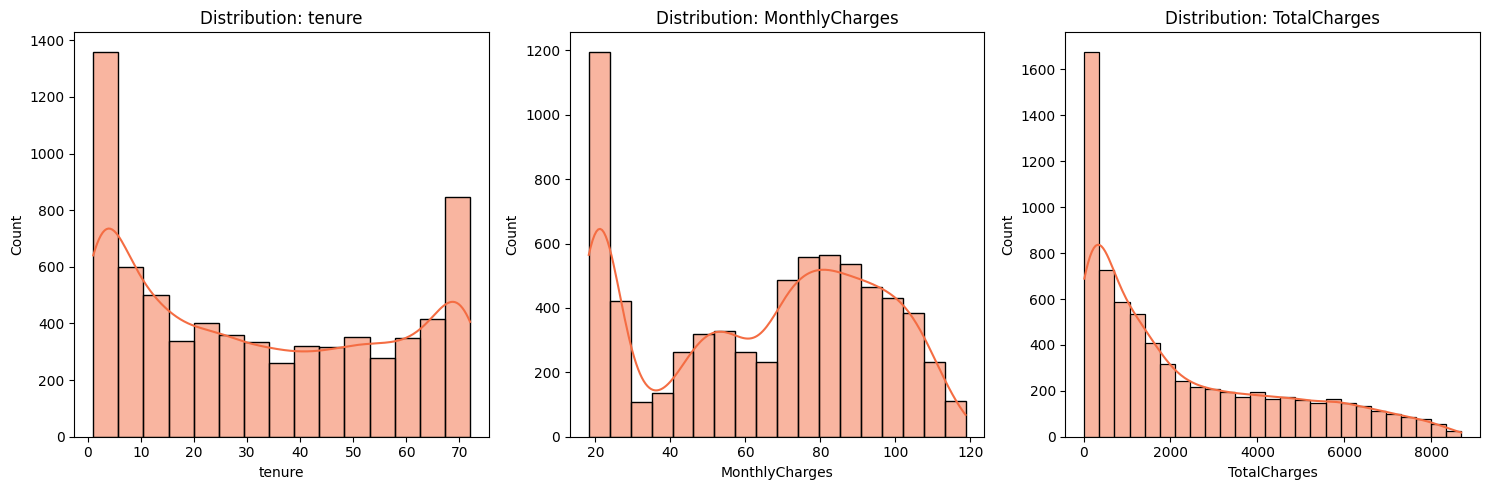

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df1, x=feature, ax=axes[i], color=colors[0], kde=True)
    axes[i].set_title(f'Distribution: {feature}')

plt.tight_layout()
plt.show()

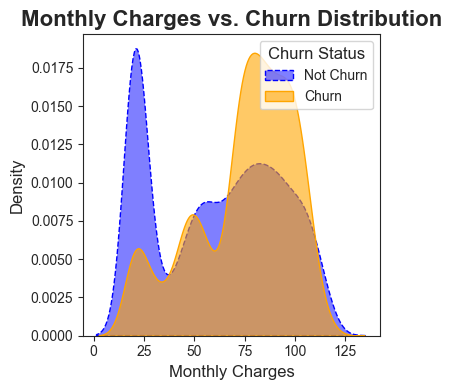

In [28]:
sns.set_style("ticks")
plt.figure(figsize=(4,4))

ax = sns.kdeplot(
    df1.MonthlyCharges[(df1["Churn"] == 0)],
    color="blue",
    linestyle="--",
    shade=True,
    alpha=0.5,
    label="Not Churn"
)
sns.kdeplot(
    df1.MonthlyCharges[(df1["Churn"] == 1)],
    color="orange",
    linestyle="-",
    shade=True,
    alpha=0.6,
    label="Churn"
)

ax.legend(title="Churn Status", loc='upper right', fontsize=10, title_fontsize=12)
ax.set_title('Monthly Charges vs. Churn Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Monthly Charges', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

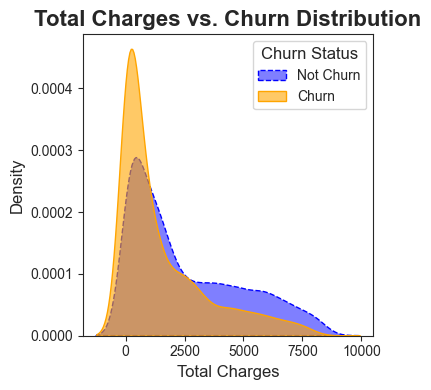

In [29]:
sns.set_style("ticks")
plt.figure(figsize=(4,4))

ax = sns.kdeplot(
    df1.TotalCharges[(df1["Churn"] == 0)],
    color="blue", 
    linestyle="--",
    shade=True,
    alpha=0.5,
    label="Not Churn"
)
sns.kdeplot(
    df1.TotalCharges[(df1["Churn"] == 1)],
    color="orange",
    linestyle="-", 
    shade=True,
    alpha=0.6,
    label="Churn"
)

ax.legend(title="Churn Status", loc='upper right', fontsize=10, title_fontsize=12)
ax.set_title('Total Charges vs. Churn Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Total Charges', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
plt.tight_layout()

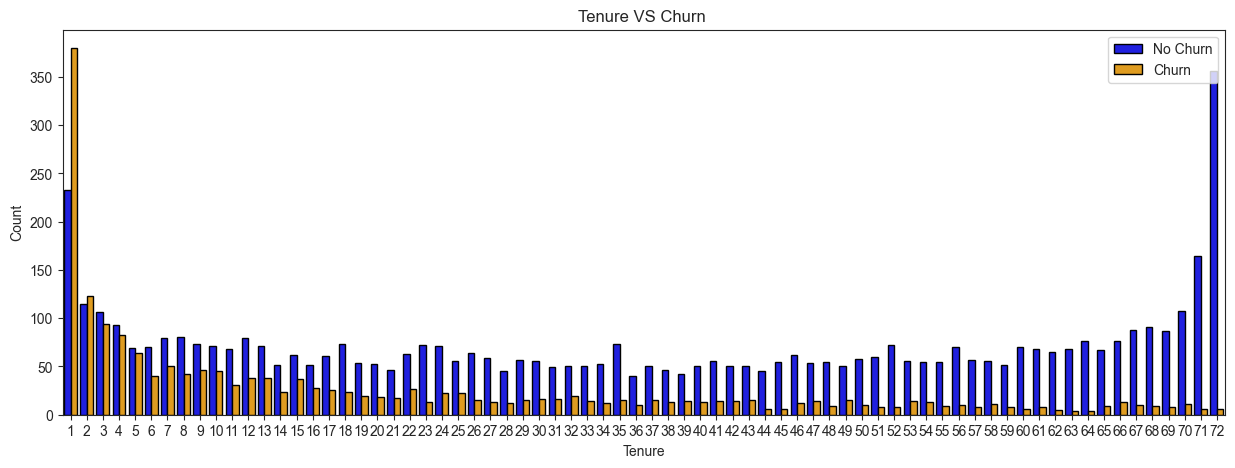

In [30]:
plt.figure(figsize = (15,5))
sns.countplot(x='tenure', data=df1, hue='Churn', palette=['blue', 'orange'], edgecolor='black')
plt.title('Tenure VS Churn ')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.show()

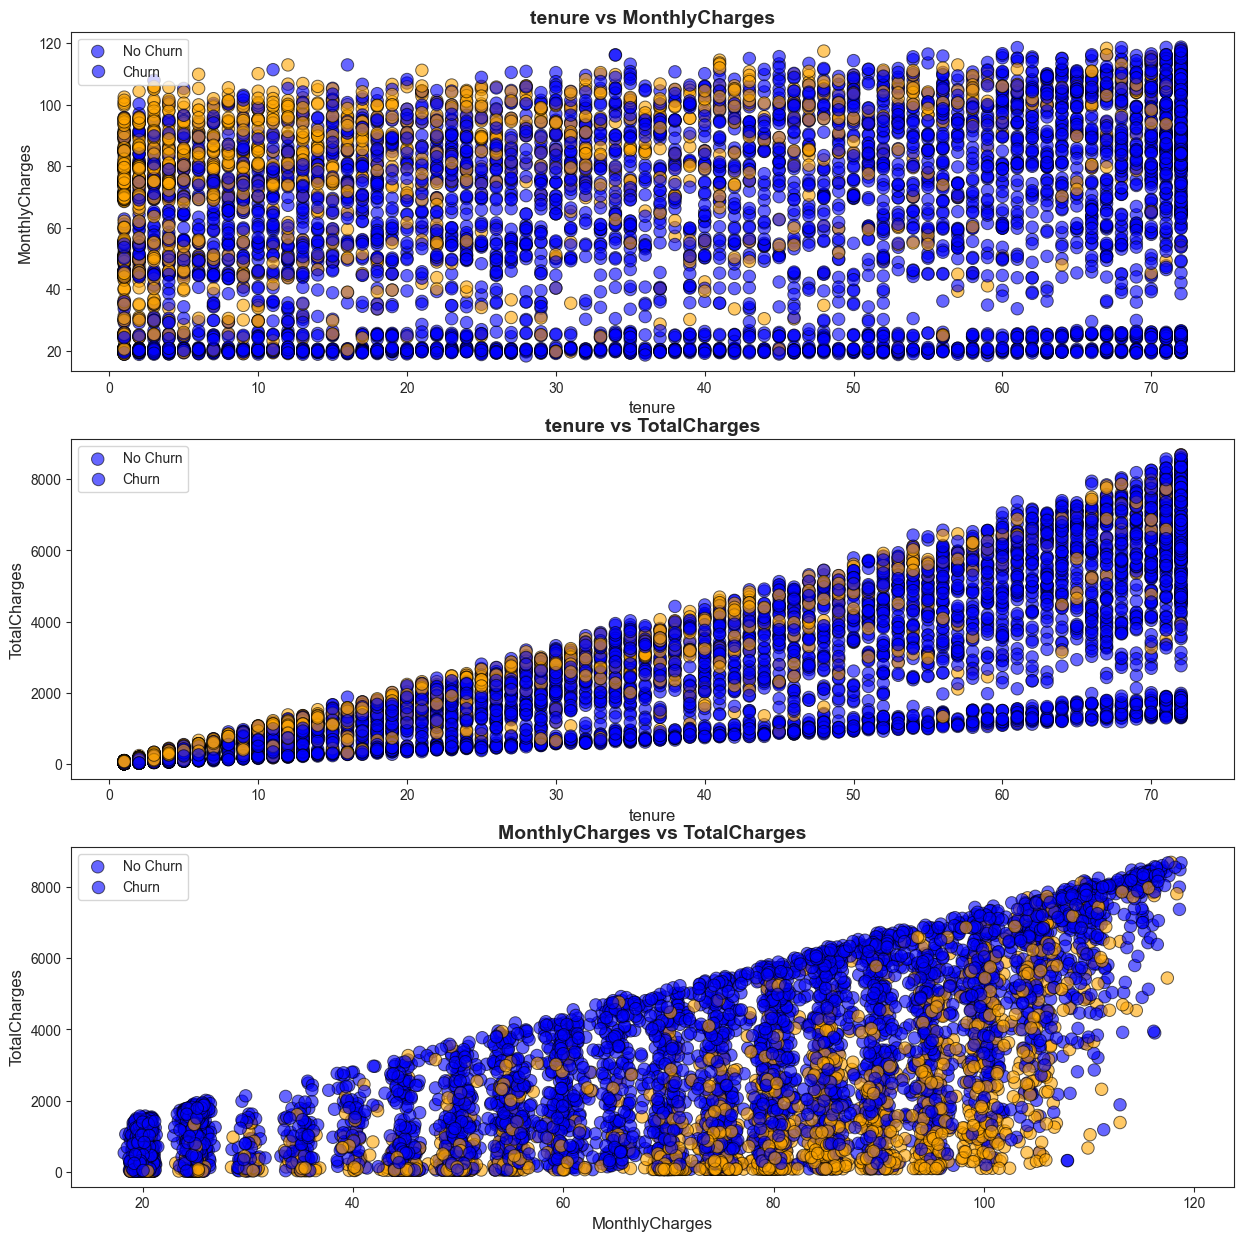

In [31]:
a = 0
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(
                x=numerical_features[i],
                y=numerical_features[j], 
                data=df1,
                hue='Churn',
                palette=['blue', 'orange'],
                edgecolor='black',
                alpha=0.6,
                s=80
            )
            plt.legend(['No Churn', 'Churn'], loc='upper left', fontsize=10)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title, fontsize=14, fontweight='bold')
            plt.xlabel(numerical_features[i], fontsize=12)
            plt.ylabel(numerical_features[j], fontsize=12)